This notebook looks stratification along thalweg in late April.

Compares dwr_base_enstr with dwr_enstr_eng

Both have diff/visc 1e-6/1e-5, isoneutral, winds

dwr_base_enstr has enstrophy conserving scheme.

dwr_enstr_eng has original choice - energy enstrophy conserving.

In [2]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
import os

from salishsea_tools import (nc_tools,viz_tools)
from nowcast import analyze

In [5]:
# Load the data. Path name can be changed to look at different data.  
runs=['dwr_base_enstr','dwr_enstr_eng']
base='/data/nsoontie/MEOPAR/SalishSea/results/stratification/'
sals={}; depths={}; avms={}; avds={}; Ws={};depthws={}; Us={}; Vs={}
for run in runs:
    path = os.path.join(base,'{}/SalishSea_1d_20030421_20030530_grid_T.nc'.format(run))
    f = NC.Dataset(path,'r');
    sals[run]=f.variables['vosaline']
    depths[run] = f.variables['deptht'] 
    T_lat = f.variables['nav_lat']
    T_lon = f.variables['nav_lon']

    #Loading eddy viscosity/diffusivity data on the vertical grid
    path = os.path.join(base,'{}/SalishSea_1d_20030421_20030530_grid_W.nc'.format(run))
    f = NC.Dataset(path,'r');
    avms[run]=f.variables['ve_eddy_visc']
    avds[run]= f.variables['ve_eddy_diff'] #
    Ws[run]=f.variables['vovecrtz']
    depthws[run] = f.variables['depthw']

    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1d_20030421_20030530_grid_U.nc'.format(run))
    f = NC.Dataset(path,'r');
    Us[run]=f.variables['vozocrtx']


    #Loading data on the ugrid
    path = os.path.join(base,'{}/SalishSea_1d_20030421_20030530_grid_V.nc'.format(run))
    f = NC.Dataset(path,'r');
    Vs[run]=f.variables['vomecrty']


grid = NC.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy=grid.variables['Bathymetry']


# Basic Comparison

# Thalweg

Plotting salinity and eddy viscosity/diffusivity along thalweg over time. Daily average outputs over 10 days.

In [6]:
run1=runs[0]
run2=runs[1]
lines = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)
T_lon=T_lon[:]
T_lat=T_lat[:]

thalweg_lon = T_lon[lines[:,0],lines[:,1]]
thalweg_lat = T_lat[lines[:,0],lines[:,1]]

ds=np.arange(0,lines.shape[0],1);
vs=np.arange(34,27.5,-0.5);
XX_T={}; ZZ_T={}; XX_W={}; ZZ_W={} 
for run in runs:
    XX_T[run],ZZ_T[run] = np.meshgrid(ds,-depths[run][:])
    XX_W[run],ZZ_W[run] = np.meshgrid(ds,-depthws[run][:])

Salinity difference along thalweg over time.

dwr_base_enstr - dwr_enstr_eng


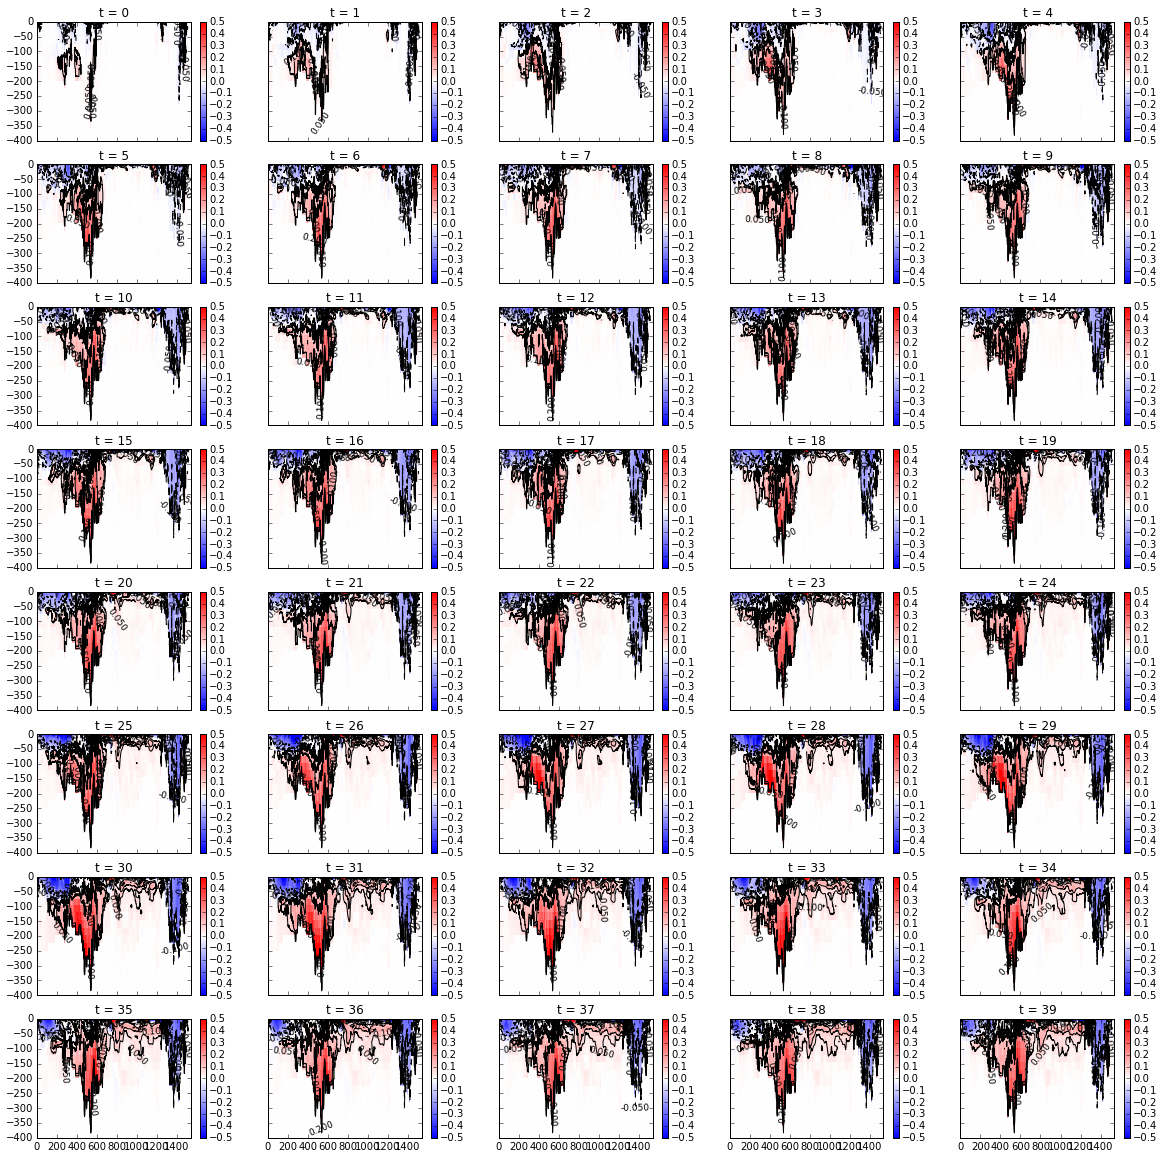

In [7]:
fig,axs=plt.subplots(8,5,figsize=(20,20),sharex=True,sharey=True)
smin=-.5;smax=.5
diff = sals[run1][:]-sals[run2][:]
for t,ax in zip(np.arange(40),axs.flat):
    mesh=ax.pcolormesh(XX_T[run],ZZ_T[run],(diff[t,:,lines[:,0],lines[:,1]]).T,vmin=smin,vmax=smax,cmap='bwr')
    CS=ax.contour(XX_T[run],ZZ_T[run],(diff[t,:,lines[:,0],lines[:,1]]).T,[-.2,-.1,-.05, .05,0.1,0.2],colors='k')
    ax.clabel(CS,fontsize=9, inline=1)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_ylim([-400,0])
    ax.set_title('t = ' +str(t))
    plt.colorbar(mesh,ax=ax)
    
print(run1 + ' - ' + run2)

* No renewal, but there is saltier water (0.1 psu) piling over the sills in the entrophy consvering case. Could run longer to see the differne over several months.

# Surface

dwr_base_enstr - dwr_enstr_eng


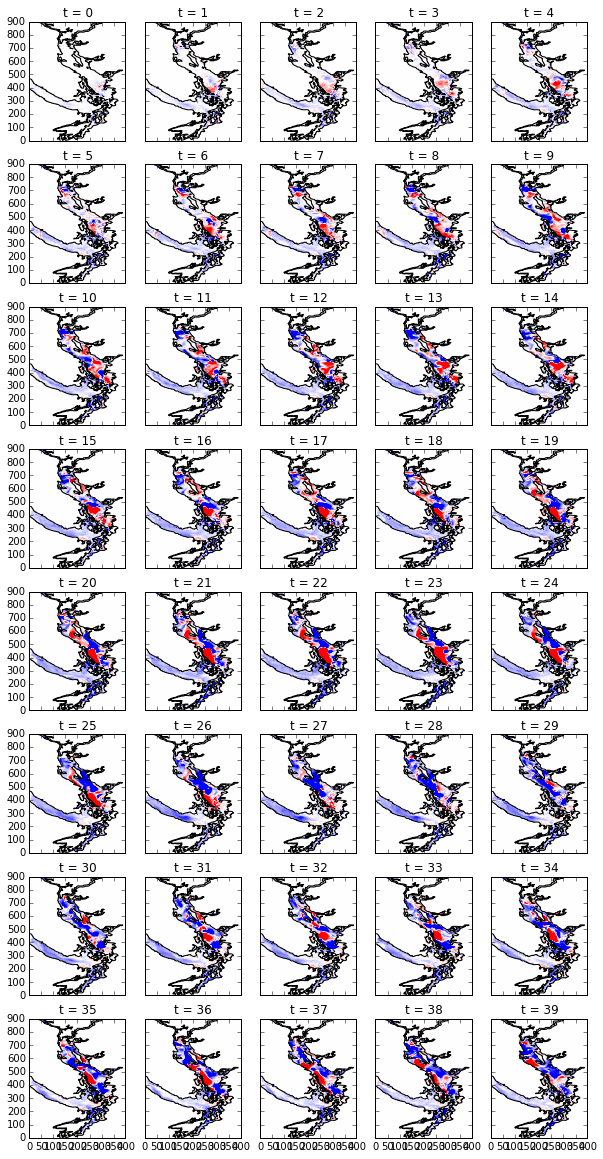

In [8]:
fig,axs=plt.subplots(8,5,figsize=(10,20),sharex=True,sharey=True)
smin=-1;smax=1; dep=0

for t,ax in zip(np.arange(40),axs.flat):
    salP=sals[run1][t,dep,:,:];
    salP1=salP
    salP=sals[run2][t,dep,:,:];
    mesh=ax.pcolormesh(salP1-salP,vmin=smin,vmax=smax,cmap='bwr')
    viz_tools.plot_coastline(ax,grid)
    
    ax.set_title('t = ' +str(t))
    
print(run1 + ' - ' + run2)

* After some time, the plume is slightly different. I wonder why.. Maybe it has shifted.

# 100m

dwr_base_enstr - dwr_enstr_eng


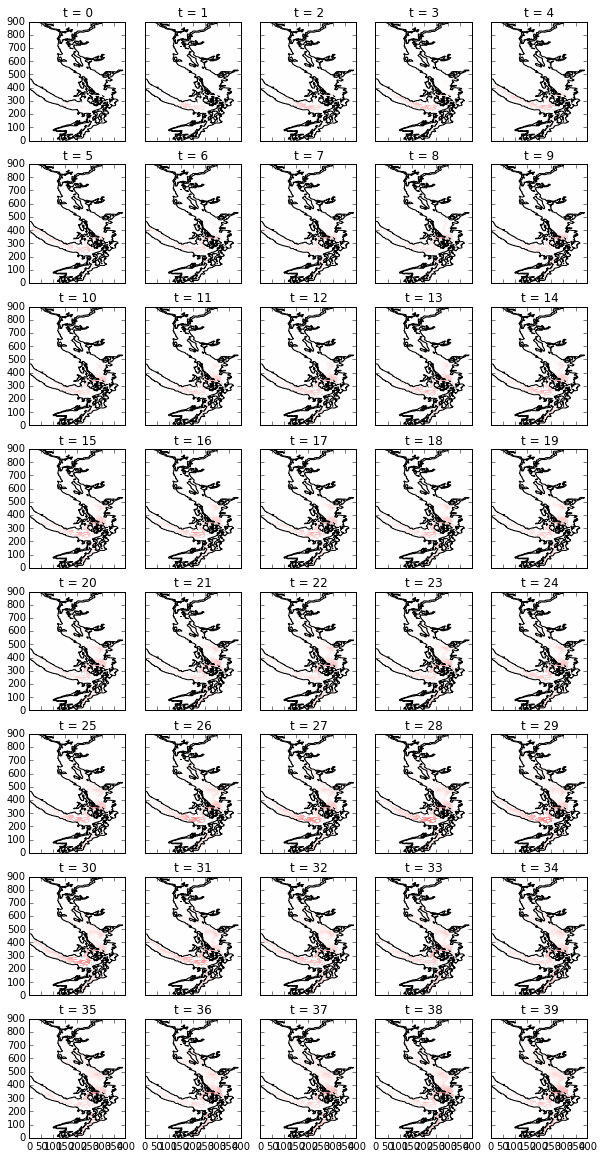

In [9]:
fig,axs=plt.subplots(8,5,figsize=(10,20),sharex=True,sharey=True)
smin=-1;smax=1; dep=26

for t,ax in zip(np.arange(40),axs.flat):
    salP=sals[run1][t,dep,:,:];
    salP1=salP
    salP=sals[run2][t,dep,:,:];
    mesh=ax.pcolormesh(salP1-salP,vmin=smin,vmax=smax,cmap='bwr')
    viz_tools.plot_coastline(ax,grid)
    
    ax.set_title('t = ' +str(t))
    
print(run1 + ' - ' + run2)

* Colorbar saturated at +-1

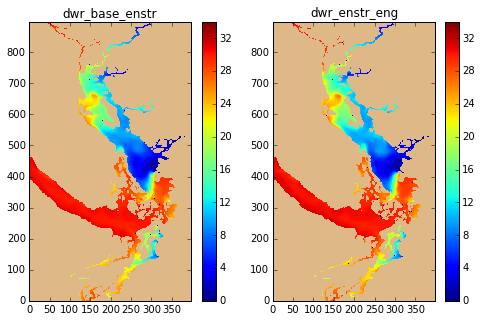

In [10]:
fig,axs=plt.subplots(1,2,figsize=(8,5))
smin=0;smax=34; dep=0; t=39
mesh=axs[0].pcolormesh(sals[run1][t,dep,:,:],vmin=smin,vmax=smax,cmap='jet')
cbar=plt.colorbar(mesh,ax=axs[0])
viz_tools.plot_land_mask(axs[0],grid,color='burlywood')
axs[0].set_title(run1)
mesh=axs[1].pcolormesh(sals[run2][t,dep,:,:],vmin=smin,vmax=smax,cmap='jet')
cbar=plt.colorbar(mesh,ax=axs[1])
viz_tools.plot_land_mask(axs[1],grid,color='burlywood')
axs[1].set_title(run2)


* Both cases have winds.


In [11]:
def average_thalweg(depth, index1,index2, var):
    #Averages the given variable along the thalweg at a depth and for indices between index1 and index2
    
    var_thal = var[depth,lines[:,0],lines[:,1]]
    #mask
    mu = var_thal==0
    var_thal=np.ma.array(var_thal,mask=mu)
    
    var_average=np.nanmean(var_thal[index1:index2])
    
    return var_average

dwr_base_enstr - dwr_enstr_eng


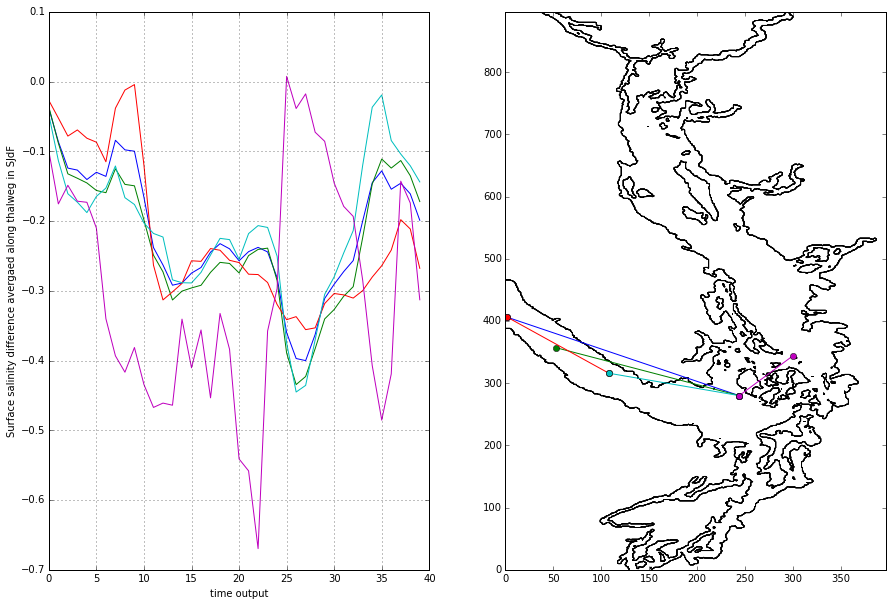

In [12]:
#plot now
t1=0;t2=40;
fig,axs = plt.subplots(1,2,figsize=(15,10))
diffs = sals[run1][t1:t2,:,:,:]-sals[run2][t1:t2,:,:,:]
tm=np.arange(t1,t2)
inds1 = [0,100,0,200,450]; inds2= [450,450,200,450,600]
dep=0; 
for ind1,ind2 in zip(inds1,inds2):
    averages = []
    for n in range(diffs.shape[0]):
        averages.append(average_thalweg(dep,ind1,ind2,diffs[n,:,:,:]))
    ax=axs[0]
    ax.plot(tm,averages)
    ax.set_xlabel('time output')
    ax.set_ylabel('Surface salinity difference avergaed along thalweg in SJdF')

    ax=axs[1]
    viz_tools.plot_coastline(ax,grid)
    ax.plot([lines[ind1,1],lines[ind2,1]],[lines[ind1,0],lines[ind2,0]],'o-')
axs[0].grid()
    
print(run1 + ' - ' + run2)

Left: dwr_base_enstr
Right: dwr_enstr_eng


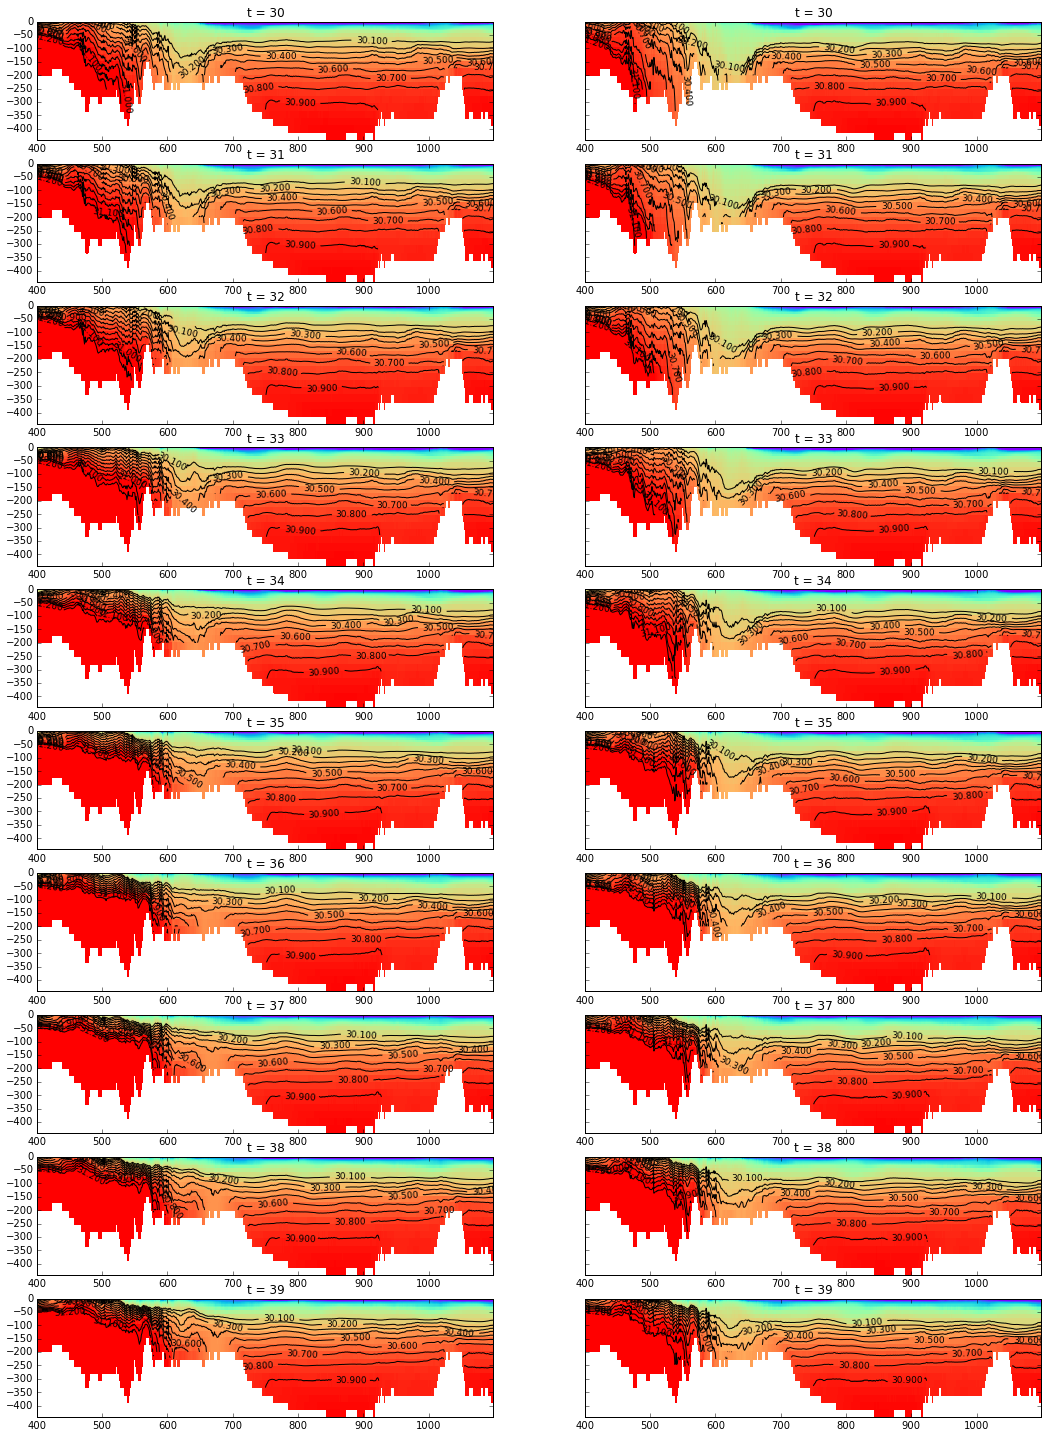

In [13]:
smin=28; smax=31
emin=-4; emax=2

(fig,axs)=plt.subplots(10,2,figsize=(18,25),sharey=True)
ts=np.arange(30,40,1)
vs=np.arange(31.2,30,-0.1);

r1=400; r2=1100;

for t,ax1,ax2 in zip(ts,axs[:,0],axs[:,1]):
    #salinity
    run=runs[0]
    salP=sals[run][:]
    salP=salP[t,:,lines[r1:r2,0],lines[r1:r2,1]];
    mu =salP == 0; salP= np.ma.array(salP,mask=mu)
    mesh=ax1.pcolormesh(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP.T,vmin=smin,vmax=smax,cmap='rainbow')
    CS=ax1.contour(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP.T,vs, colors='black')
    ax1.clabel(CS,fontsize=9, inline=1)
    ax1.set_title('t = ' +str(t))
    
    run=runs[1]
    salP=sals[run][:]
    salP=salP[t,:,lines[r1:r2,0],lines[r1:r2,1]];
    mu =salP == 0; salP= np.ma.array(salP,mask=mu)
    mesh=ax2.pcolormesh(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP.T,vmin=smin,vmax=smax,cmap='rainbow')
    CS=ax2.contour(XX_T[run][:,r1:r2],ZZ_T[run][:,r1:r2],salP.T,vs, colors='black')
    ax2.clabel(CS,fontsize=9, inline=1)
    ax2.set_title('t = ' +str(t))
print('Left:', runs[0])
print('Right:', runs[1])

* Slight more of the 31 salinity water coming into the basin on the renewal. I think It is worhtwhile to investigate a saltier deep JDF bc.

# Average salinity over a volume

In this case, averaging will take into account that the grid spacing changes vertically. But I am assuming that horizontal grid boxes are equal area.

In [14]:
def average_over_box(varis,depths,t,imin,imax,jmin,jmax,dmin,dmax):
    """Average field stored in var over a box at a time t. """
    
    var_av={}
    #iteraring over variables in varis
    for key, var in varis.items():
        #subdomain
        sub = var[t,dmin:dmax+1,jmin:jmax+1,imin:imax+1]
        sub_dep = depths[key][dmin:dmax+1]
        #mask
        sub=np.ma.masked_values(sub,0)
        #averaing horizontally. Assuming horizontal grid boxes are equal area
        sub = np.nanmean(sub,axis=2)
        sub = np.nanmean(sub,axis=1)
        var_av[key]=analyze.depth_average(sub,sub_dep,depth_axis=0)
    return var_av

In [15]:
def compare_volume_average(imin,imax,jmin,jmax,dmin,dmax):
    """"time series of volume averages comparison"""
    #time series of average
    keys=list(sals.keys())
    sals_av = {keys[0]:[],keys[1]:[]}
    for t in np.arange(sals[keys[1]].shape[0]):
        avg=average_over_box(sals,depths,t,imin,imax,jmin,jmax,dmin,dmax)
        for run, out in avg.items():
            sals_av[run].append(out)
    
    #plotting
    fig,axs=plt.subplots(1,2,figsize=(10,5))
    #map
    ax=axs[0]
    viz_tools.plot_coastline(ax,grid)
    ax.plot([imin,imax],[jmin,jmin],'r-')
    ax.plot([imin,imax],[jmax,jmax],'r-')
    ax.plot([imin,imin],[jmin,jmax],'r-')
    ax.plot([imax,imax],[jmin,jmax],'r-')
    
    #averages
    ax=axs[1]
    for key, sal_plot in sals_av.items():
        ax.plot(sal_plot,label=key)
        ax.legend(loc=0)
        ax.set_xlabel('output time')
        ax.set_ylabel('Average Salinity [psu]')
    ax.set_title('Depth range {0:.3} -{1:.3} m'.format(depths[key][dmin], depths[key][dmax]))
    ax.grid()
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    
    diff = np.array(sals_av[keys[1]])-np.array(sals_av[keys[0]])
    print ('Difference between {} and {} in [psu]'.format(keys[1], keys[0]))
    print ('Max diff: {0:.2}'.format(np.max(diff)))
    print ('Min diff: {0:.2}'.format(np.min(diff)))
    print ('Mean diff: {0:.2}'.format(np.mean(diff)))
    return fig


## Juan de Fuca - surface, depth, whole water column

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: -0.012
Min diff: -0.22
Mean diff: -0.13


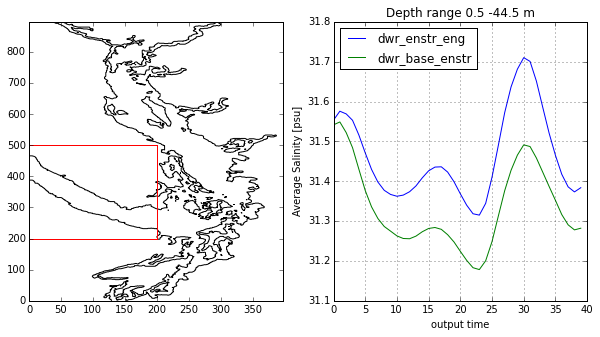

In [16]:
fig = compare_volume_average(0,200,200,500,0,23)

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: 0.053
Min diff: 0.0083
Mean diff: 0.026


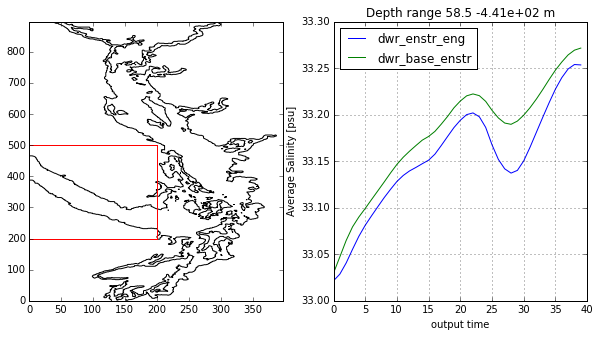

In [17]:
fig = compare_volume_average(0,200,200,500,24,39)

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: 0.011
Min diff: -0.0097
Mean diff: -0.0014


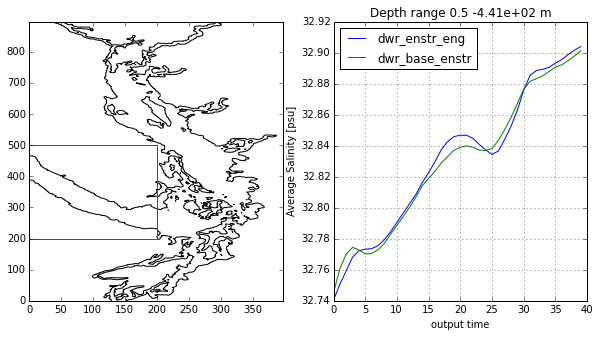

In [18]:
fig = compare_volume_average(0,200,200,500,0,39)

* As expected, deep JDF is saltier.
* Surface is also getting saliter. This may be related to the mixing over the sills/estuarine exchange or vertical diffusion in the JdF region.

## Gulf Islands - surface, depth, whole water column

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: 0.095
Min diff: -0.023
Mean diff: 0.012


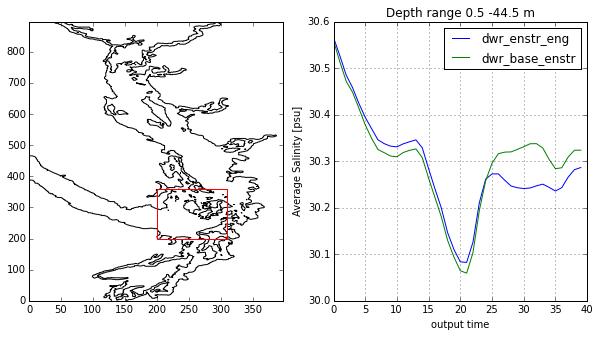

In [19]:
fig = compare_volume_average(200,310,200,360,0,23)

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: 0.39
Min diff: 0.026
Mean diff: 0.24


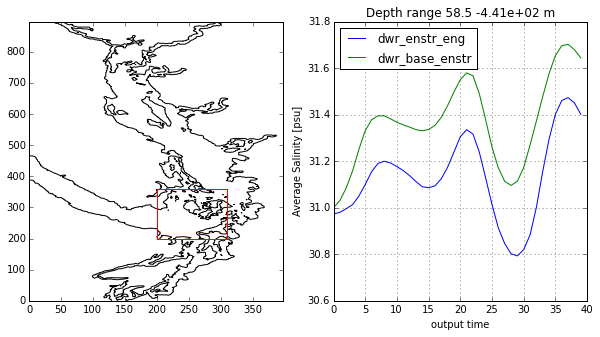

In [20]:
fig = compare_volume_average(200,310,200,360,24,39)

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: 0.34
Min diff: 0.021
Mean diff: 0.2


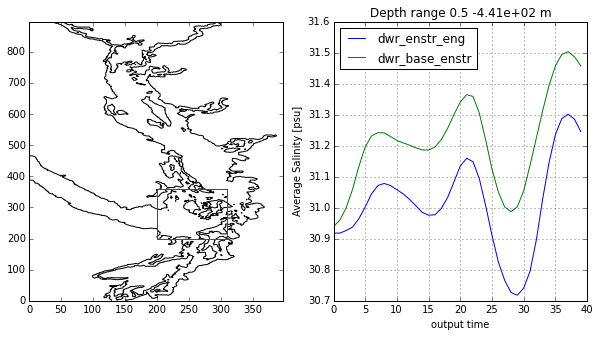

In [21]:
fig = compare_volume_average(200,310,200,360,0,39)

* Slightly saltier in Gulf Islands. Average 0.058 psu. We are 1 psu off in the deep SoG waters after a long time of overmixing.

## Strait of Georgia - surface(0-50), intermediate (50-200), depth (200-400), whole water column

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: 0.085
Min diff: -0.00034
Mean diff: 0.04


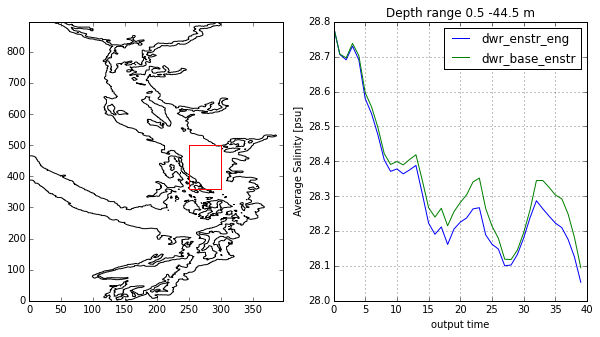

In [22]:
fig = compare_volume_average(250,300,360,500,0,23)

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: 0.074
Min diff: 0.00031
Mean diff: 0.035


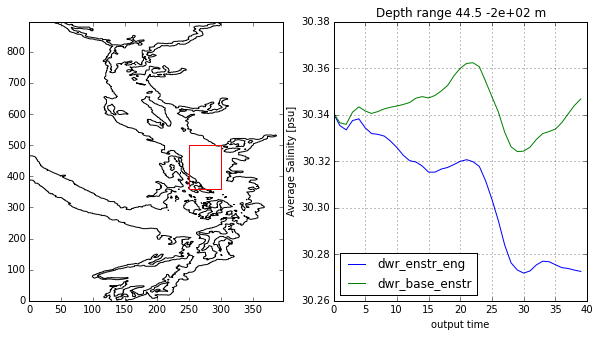

In [23]:
fig = compare_volume_average(250,300,360,500,23,30)

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: 0.0018
Min diff: -0.0019
Mean diff: 0.00017


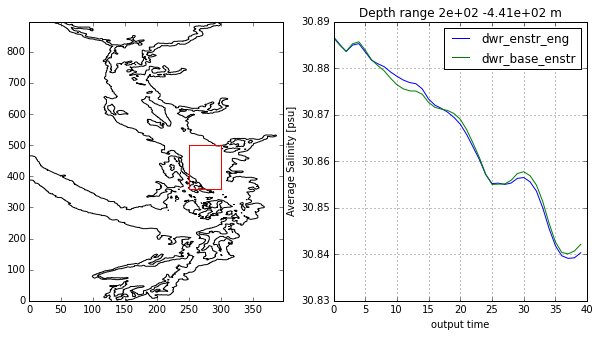

In [24]:
fig = compare_volume_average(250,300,360,500,30,39)

Difference between dwr_base_enstr and dwr_enstr_eng in [psu]
Max diff: 0.035
Min diff: -1.8e-05
Mean diff: 0.019


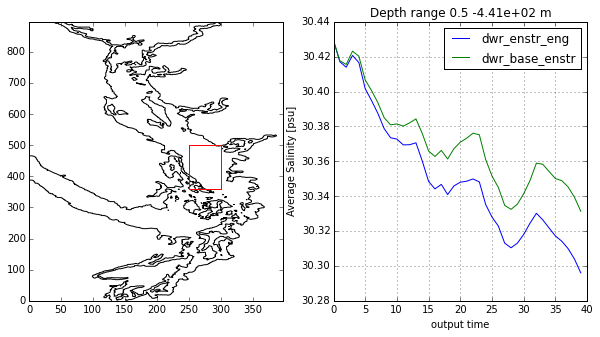

In [25]:
fig = compare_volume_average(250,300,360,500,0,39)

* Intermediate is getting saltier. Differences are small, but I'm averaging over large areas.
* Not much effect on surface JDF


# Summary

* Saliter over the sills. No deep water renewal.